Qiskit Basic Programming course material, Author: Daisaku Yokomatsu,  Date: Nov.16,2024

### 'Sample of measurement'  Qiskit code 

<div class="alert alert-block alert-success">
<b>このプログラムの目的：</b> 1量子ビットの重ね合わせ状態を設定し、その測定を行うコードです。
</div>

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

##### 以下の量子状態を設定し、測定を行う。
$$ |\psi\rangle = |1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

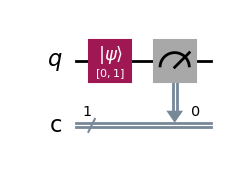

In [2]:
# １量子ビットの量子回路を作る(古典レジスタも１つ用意する)
qc = QuantumCircuit(1, 1)

# 初期状態ベクトルを定義 (|1⟩を設定)
initial_state = [0, 1]

# Statevectorを使って量子状態を設定
state = Statevector(initial_state)
qc.initialize(state, 0)

# 測定
qc.measure(0, 0)

qc.draw('mpl')


In [3]:
# 回路の実行
backend = AerSimulator()
job = backend.run(qc,shots=100,memory=True)
result = job.result()

# 結果の取得と表示
counts = result.get_counts()
counts

{'1': 100}

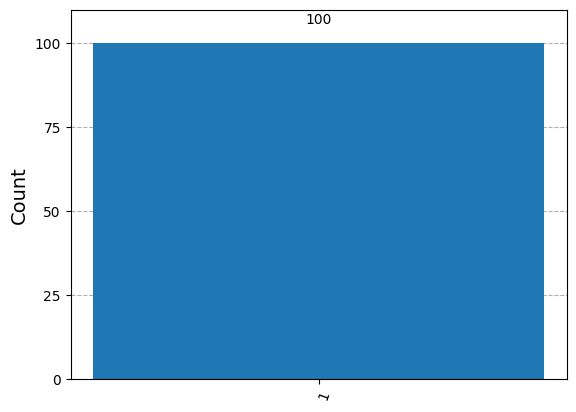

In [4]:
# ヒストグラムの描画
plot_histogram(counts)

##### 重ね合わせ状態を設定し、測定を行う。
$$ |\psi\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle $$

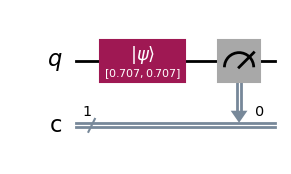

In [5]:
# １量子ビットの量子回路を作る(古典レジスタも１つ用意する)
qc = QuantumCircuit(1, 1)

# 初期状態ベクトルを定義 (|0⟩と|1⟩の重ね合わせ)
initial_state = [1/np.sqrt(2), 1/np.sqrt(2)]

# Statevectorを使って量子状態を設定
state = Statevector(initial_state)
qc.initialize(state, 0)

# 測定
qc.measure(0, 0)

qc.draw('mpl')


In [6]:
# 回路の実行
backend = AerSimulator()
job = backend.run(qc,shots=100,memory=True)
result = job.result()

# 結果の取得と表示
counts = result.get_counts()
counts

{'0': 41, '1': 59}

In [7]:
result

Result(backend_name='aer_simulator', backend_version='0.15.1', qobj_id='', job_id='4b98dabf-49f9-4b86-b989-9b023b4bb4c0', success=True, results=[ExperimentResult(shots=100, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 41, '0x1': 59}, memory=['0x0', '0x0', '0x1', '0x0', '0x0', '0x0', '0x1', '0x0', '0x0', '0x0', '0x0', '0x0', '0x1', '0x0', '0x0', '0x1', '0x1', '0x0', '0x1', '0x1', '0x1', '0x1', '0x1', '0x1', '0x1', '0x0', '0x1', '0x1', '0x1', '0x0', '0x1', '0x1', '0x1', '0x1', '0x1', '0x0', '0x0', '0x1', '0x0', '0x0', '0x0', '0x1', '0x1', '0x0', '0x1', '0x1', '0x1', '0x0', '0x1', '0x1', '0x1', '0x0', '0x0', '0x1', '0x1', '0x0', '0x1', '0x1', '0x1', '0x1', '0x1', '0x1', '0x0', '0x1', '0x0', '0x1', '0x1', '0x0', '0x0', '0x0', '0x1', '0x1', '0x1', '0x1', '0x0', '0x0', '0x1', '0x1', '0x1', '0x0', '0x0', '0x1', '0x1', '0x1', '0x1', '0x0', '0x1', '0x0', '0x0', '0x1', '0x1', '0x1', '0x1', '0x0', '0x0', '0x1', '0x1', '0x1', '0x0', '0x0']), header=QobjExperimentHeader(creg

#### 上記の結果からわかるように、量子回路を100回実行し、0, 1を測定した回数をカウントしていることがわかる。
backend.runのオプション shots で実行回数を指定（デフォルトは1024）し、実行結果をとっておく場合、memory をTrueに指定する。

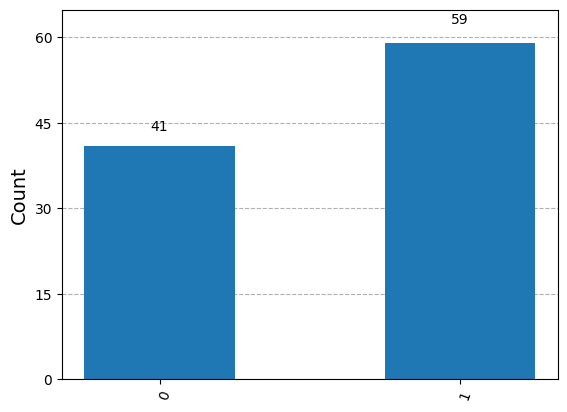

In [8]:
# ヒストグラムの描画
plot_histogram(counts)

### 量子回路をセットせずに状態ベクトルに測定メソッドを適用する簡易バージョン

In [9]:
initial_state = [1/np.sqrt(2), 1/np.sqrt(2)]
state = Statevector(initial_state)

In [10]:
state

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [11]:
state.draw('latex')

<IPython.core.display.Latex object>

In [12]:
state.measure()

(np.str_('0'),
 Statevector([1.+0.j, 0.+0.j],
             dims=(2,)))

In [13]:
state.measure()

(np.str_('1'),
 Statevector([0.+0.j, 1.+0.j],
             dims=(2,)))

In [14]:
state.measure()

(np.str_('0'),
 Statevector([1.+0.j, 0.+0.j],
             dims=(2,)))

#### １量子ビットに量子状態として $\frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle$ を設定し、２回測定をした結果を見る

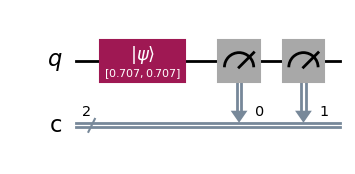

In [15]:

# 量子回路の作成（1量子ビット、2古典ビット）
qc = QuantumCircuit(1, 2)

# 初期状態ベクトルを定義 (|0⟩と|1⟩の重ね合わせ)
initial_state = [1/np.sqrt(2), 1/np.sqrt(2)]

# Statevectorを使って量子状態を設定
state = Statevector(initial_state)
qc.initialize(state, 0)

# 1回目の測定：測定結果を０番目の古典レジスタに入れる
qc.measure(0, 0)

# 2回目の測定：測定結果を１番目の古典レジスタに入れる
qc.measure(0, 1)

# 回路の描画
qc.draw('mpl')


測定結果:
{'11': 495, '00': 505}


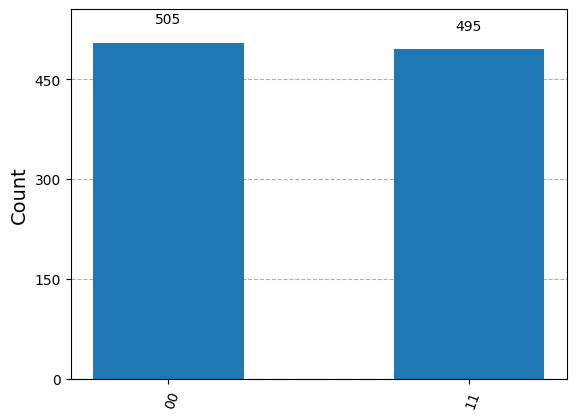

In [16]:
# シミュレータの設定
backend = AerSimulator()

# 回路の実行（1000回）
job = backend.run(qc, shots=1000)
result = job.result()

# 結果の取得と表示
counts = result.get_counts(qc)
print("\n測定結果:")
print(counts)

# ヒストグラムの描画
plot_histogram(counts)

測定結果は２ビットの数値として表現される。  
２ビットを$b_1 b_0$と表すと、$b_0$に１回目の測定結果、$b_1$に２回目の測定結果が表示される。  
１回目の測定結果と２回目の測定結果が異なれば、１０または０１という測定結果のパターンが出るはずだが、  
測定結果は００か１１のパターンしかない。  
これは１回目の測定を行った後に２回目の測定を行った結果は１回目と同一となることを示している。  
いずれにしても測定により、元の量子状態は破壊されてしまうことがわかる。

<div class="alert alert-block alert-info">
<b>練習問題:</b> 量子状態    $$ |\psi\rangle = \sqrt{\frac{1}{4}} |0\rangle + \sqrt{\frac{3}{4}} |1\rangle $$
を設定し、$|0\rangle$、$|1\rangle$を測定する確率を求めるコードを書いてください。
</div>

---

####  Python, Qiskitのバージョン情報

In [17]:
import sys
print(sys.version)

3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]


In [18]:
import qiskit
print("Qiskit version:", qiskit.__version__)

Qiskit version: 1.2.4
